In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import binom
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind
from pandas.plotting import scatter_matrix
import scipy.stats as st
import statistics as stats

In [2]:
df3 = pd.read_csv("DF2_STATS.csv")

# Dealing with outliers

In [3]:
cat_features = df3.select_dtypes('object').copy()
num_features = df3.select_dtypes(['float64', 'int64']).copy()
cat_features.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Sales,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [4]:
num_features.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Zscore
0,41.920786,1.016716,1.770313,2.146294,3.426960,2.464492,3.397665,6438.949336,7.077818,9.898765,...,1.012832,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972,0.580921
1,51.589037,6.920808,1.035333,3.470803,1.813458,1.788697,1.584059,4457.659622,1.114423,14.495151,...,4.312008,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207,1.610741
2,33.131540,2.198662,2.118801,3.979420,1.877226,0.833488,3.301009,2124.545220,5.539591,15.401596,...,2.332558,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000,-0.355272
3,34.707073,2.937851,3.670674,3.734705,2.932646,1.095372,3.220844,2771.699080,0.772793,9.757546,...,3.029591,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000,-0.187453
4,24.790188,1.988953,1.120496,1.079412,3.117739,0.937746,1.697330,3254.601575,10.118125,11.920147,...,2.720431,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353,-1.243757


In [5]:
def plot_numeric_variable_boxplots(df3):
    numerical_vars = df3.select_dtypes(include=['float64', 'int64']).columns
    num_vars = len(numerical_vars)
    rows = (num_vars // 4) + (num_vars % 4)
    
    fig, axs = plt.subplots(rows, 4, figsize=(20, 6*rows))
    axs = axs.flatten()
    
    for i, var in enumerate(numerical_vars):
        sns.boxplot(data=df3, x=var, ax=axs[i])
        axs[i].set_title(f"Boxplot of {var}")
    
    for i in range(num_vars, 4*rows):
        fig.delaxes(axs[i])
    
    plt.tight_layout()
    plt.show()

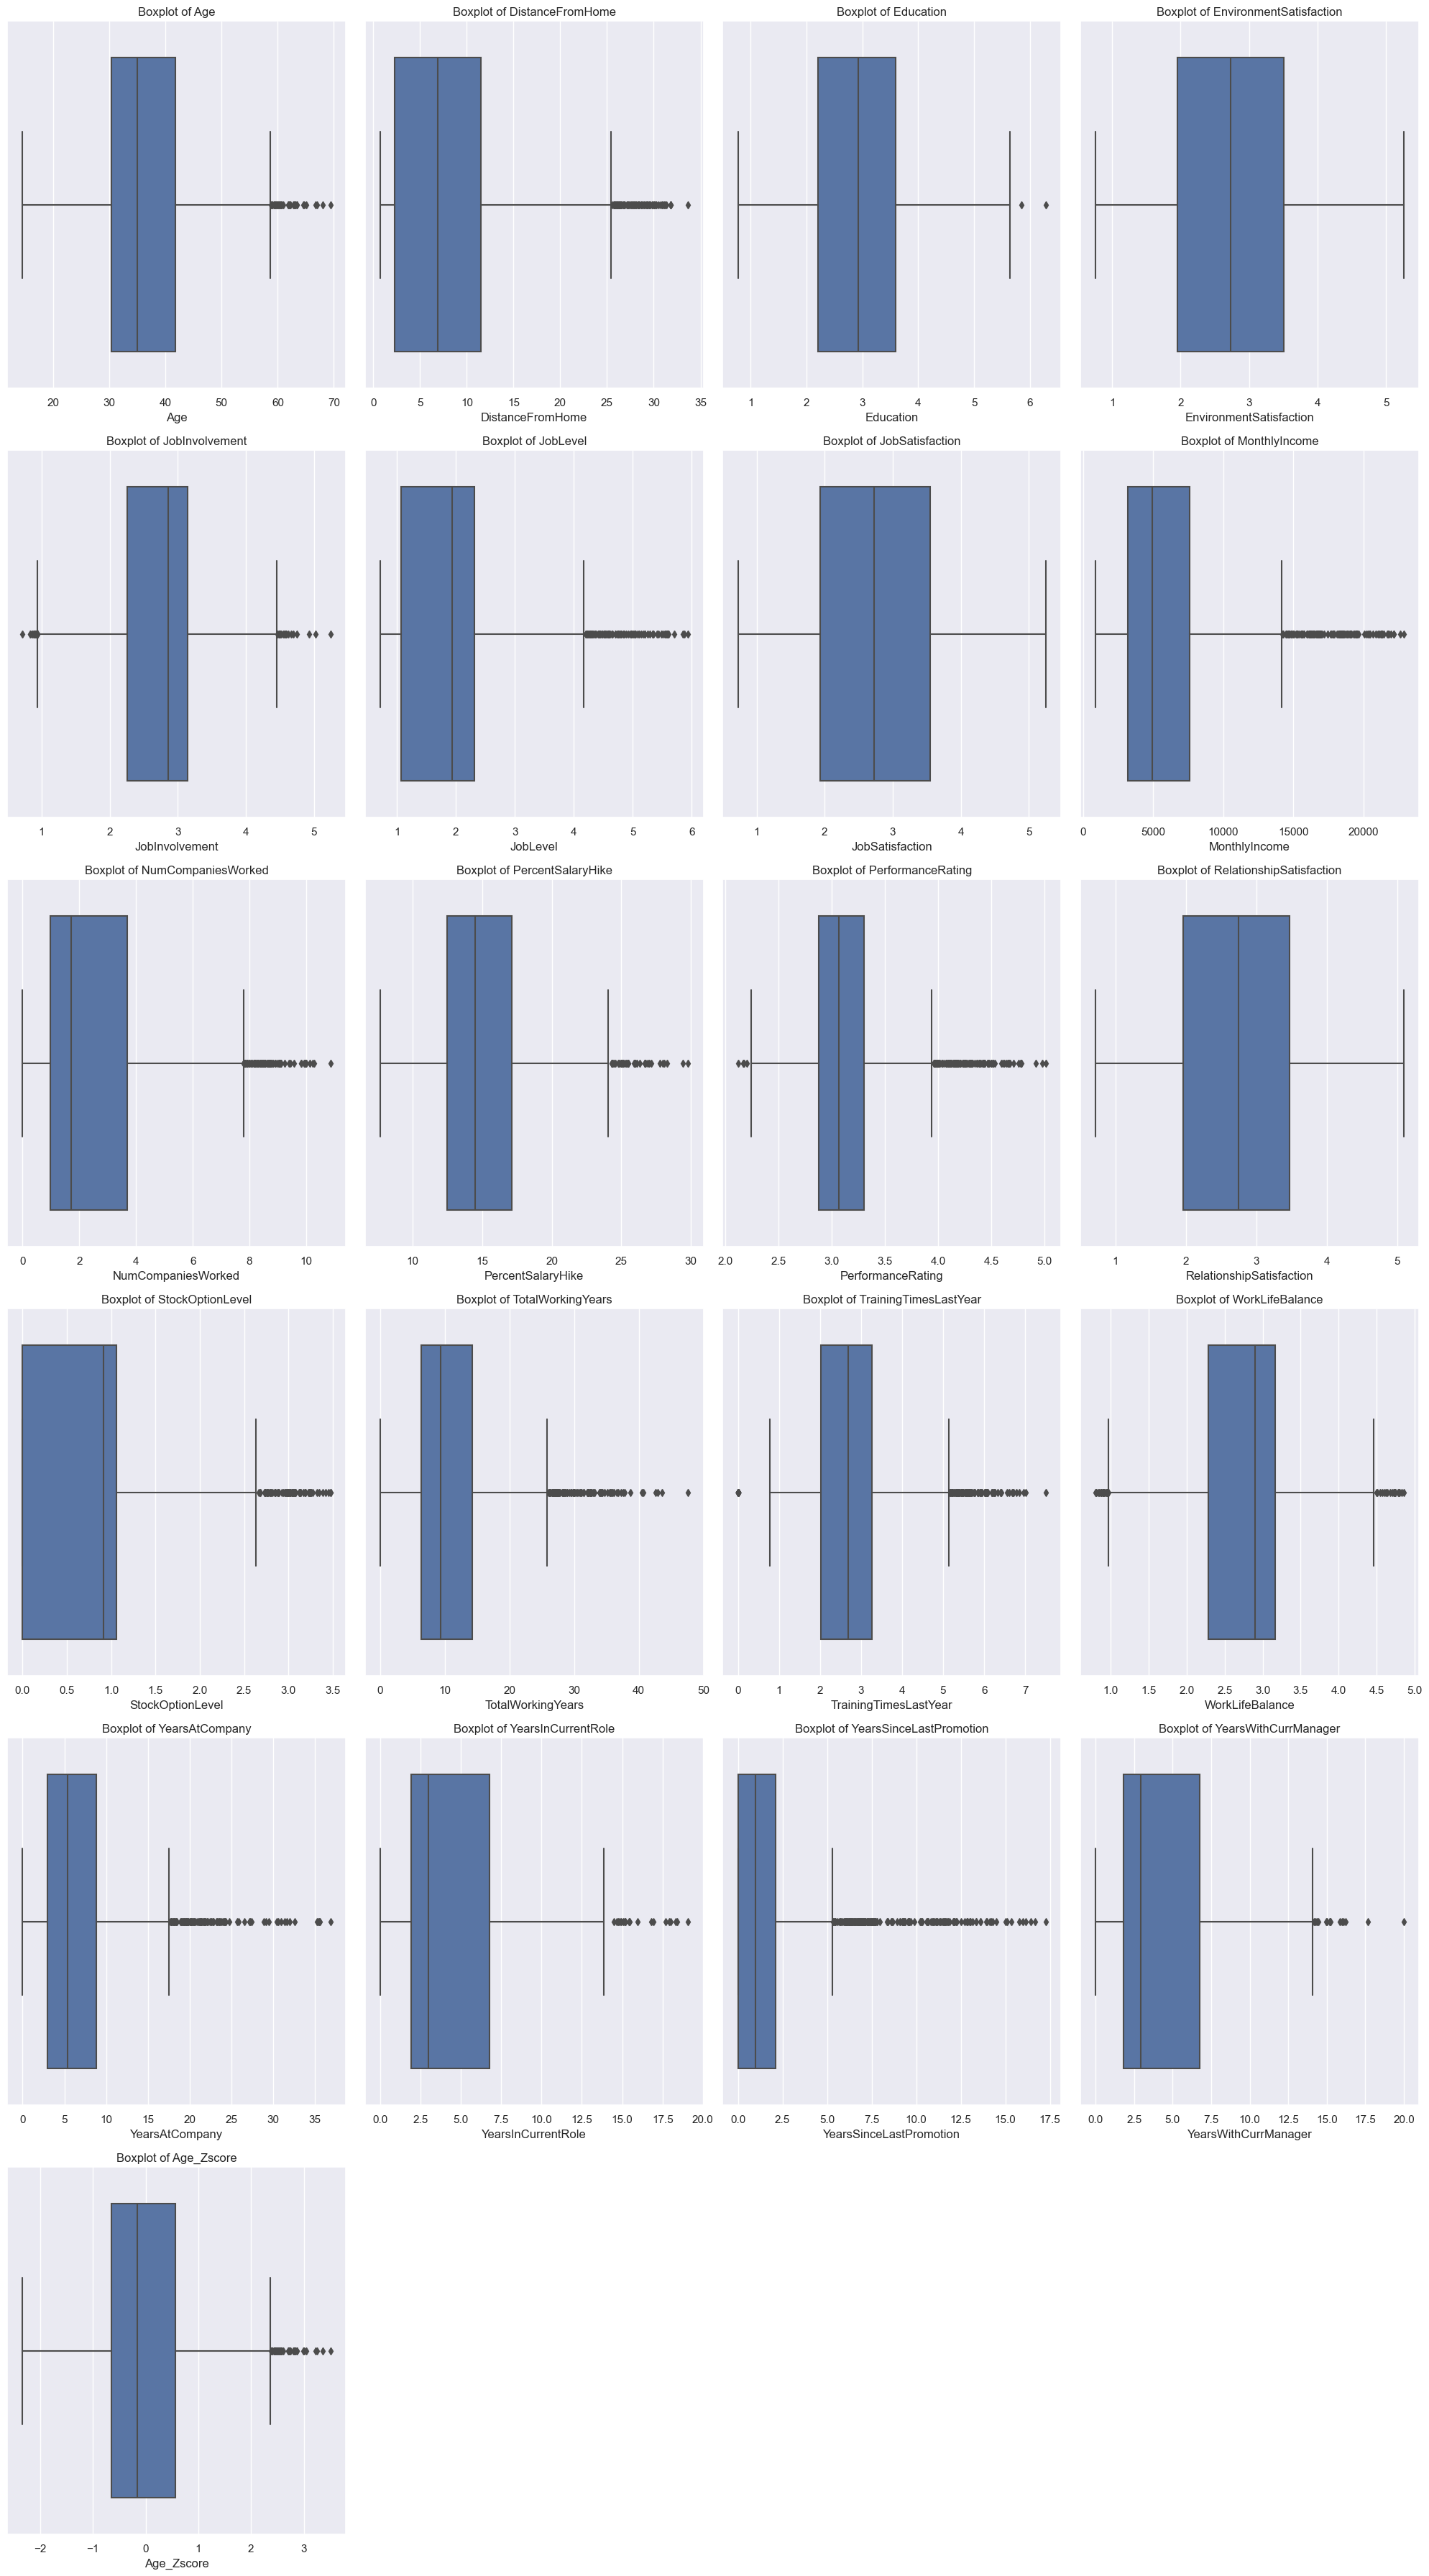

In [6]:
plot_numeric_variable_boxplots(num_features)

In [7]:
def replace_outliers_with_upper(dataframe, method='iqr', multiplier=1.5):
    numerical_vars = dataframe.select_dtypes(include=['float64', 'int64']).columns
    for var in numerical_vars:
        if method == 'iqr':
            Q1 = dataframe[var].quantile(0.25)
            Q3 = dataframe[var].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - multiplier * IQR
            upper_bound = Q3 + multiplier * IQR
            dataframe[var] = np.where(dataframe[var] >= upper_bound, upper_bound, dataframe[var])
        elif method == 'std':
            mean = dataframe[var].mean()
            std = dataframe[var].std()
            lower_bound = mean - multiplier * std
            upper_bound = mean + multiplier * std
            dataframe[var] = np.where(dataframe[var] >= upper_bound, dataframe[dataframe[var] <= upper_bound][var].max(), dataframe[var])
        else:
            raise ValueError("Invalid method. Choose either 'iqr' or 'std'.")
    return dataframe

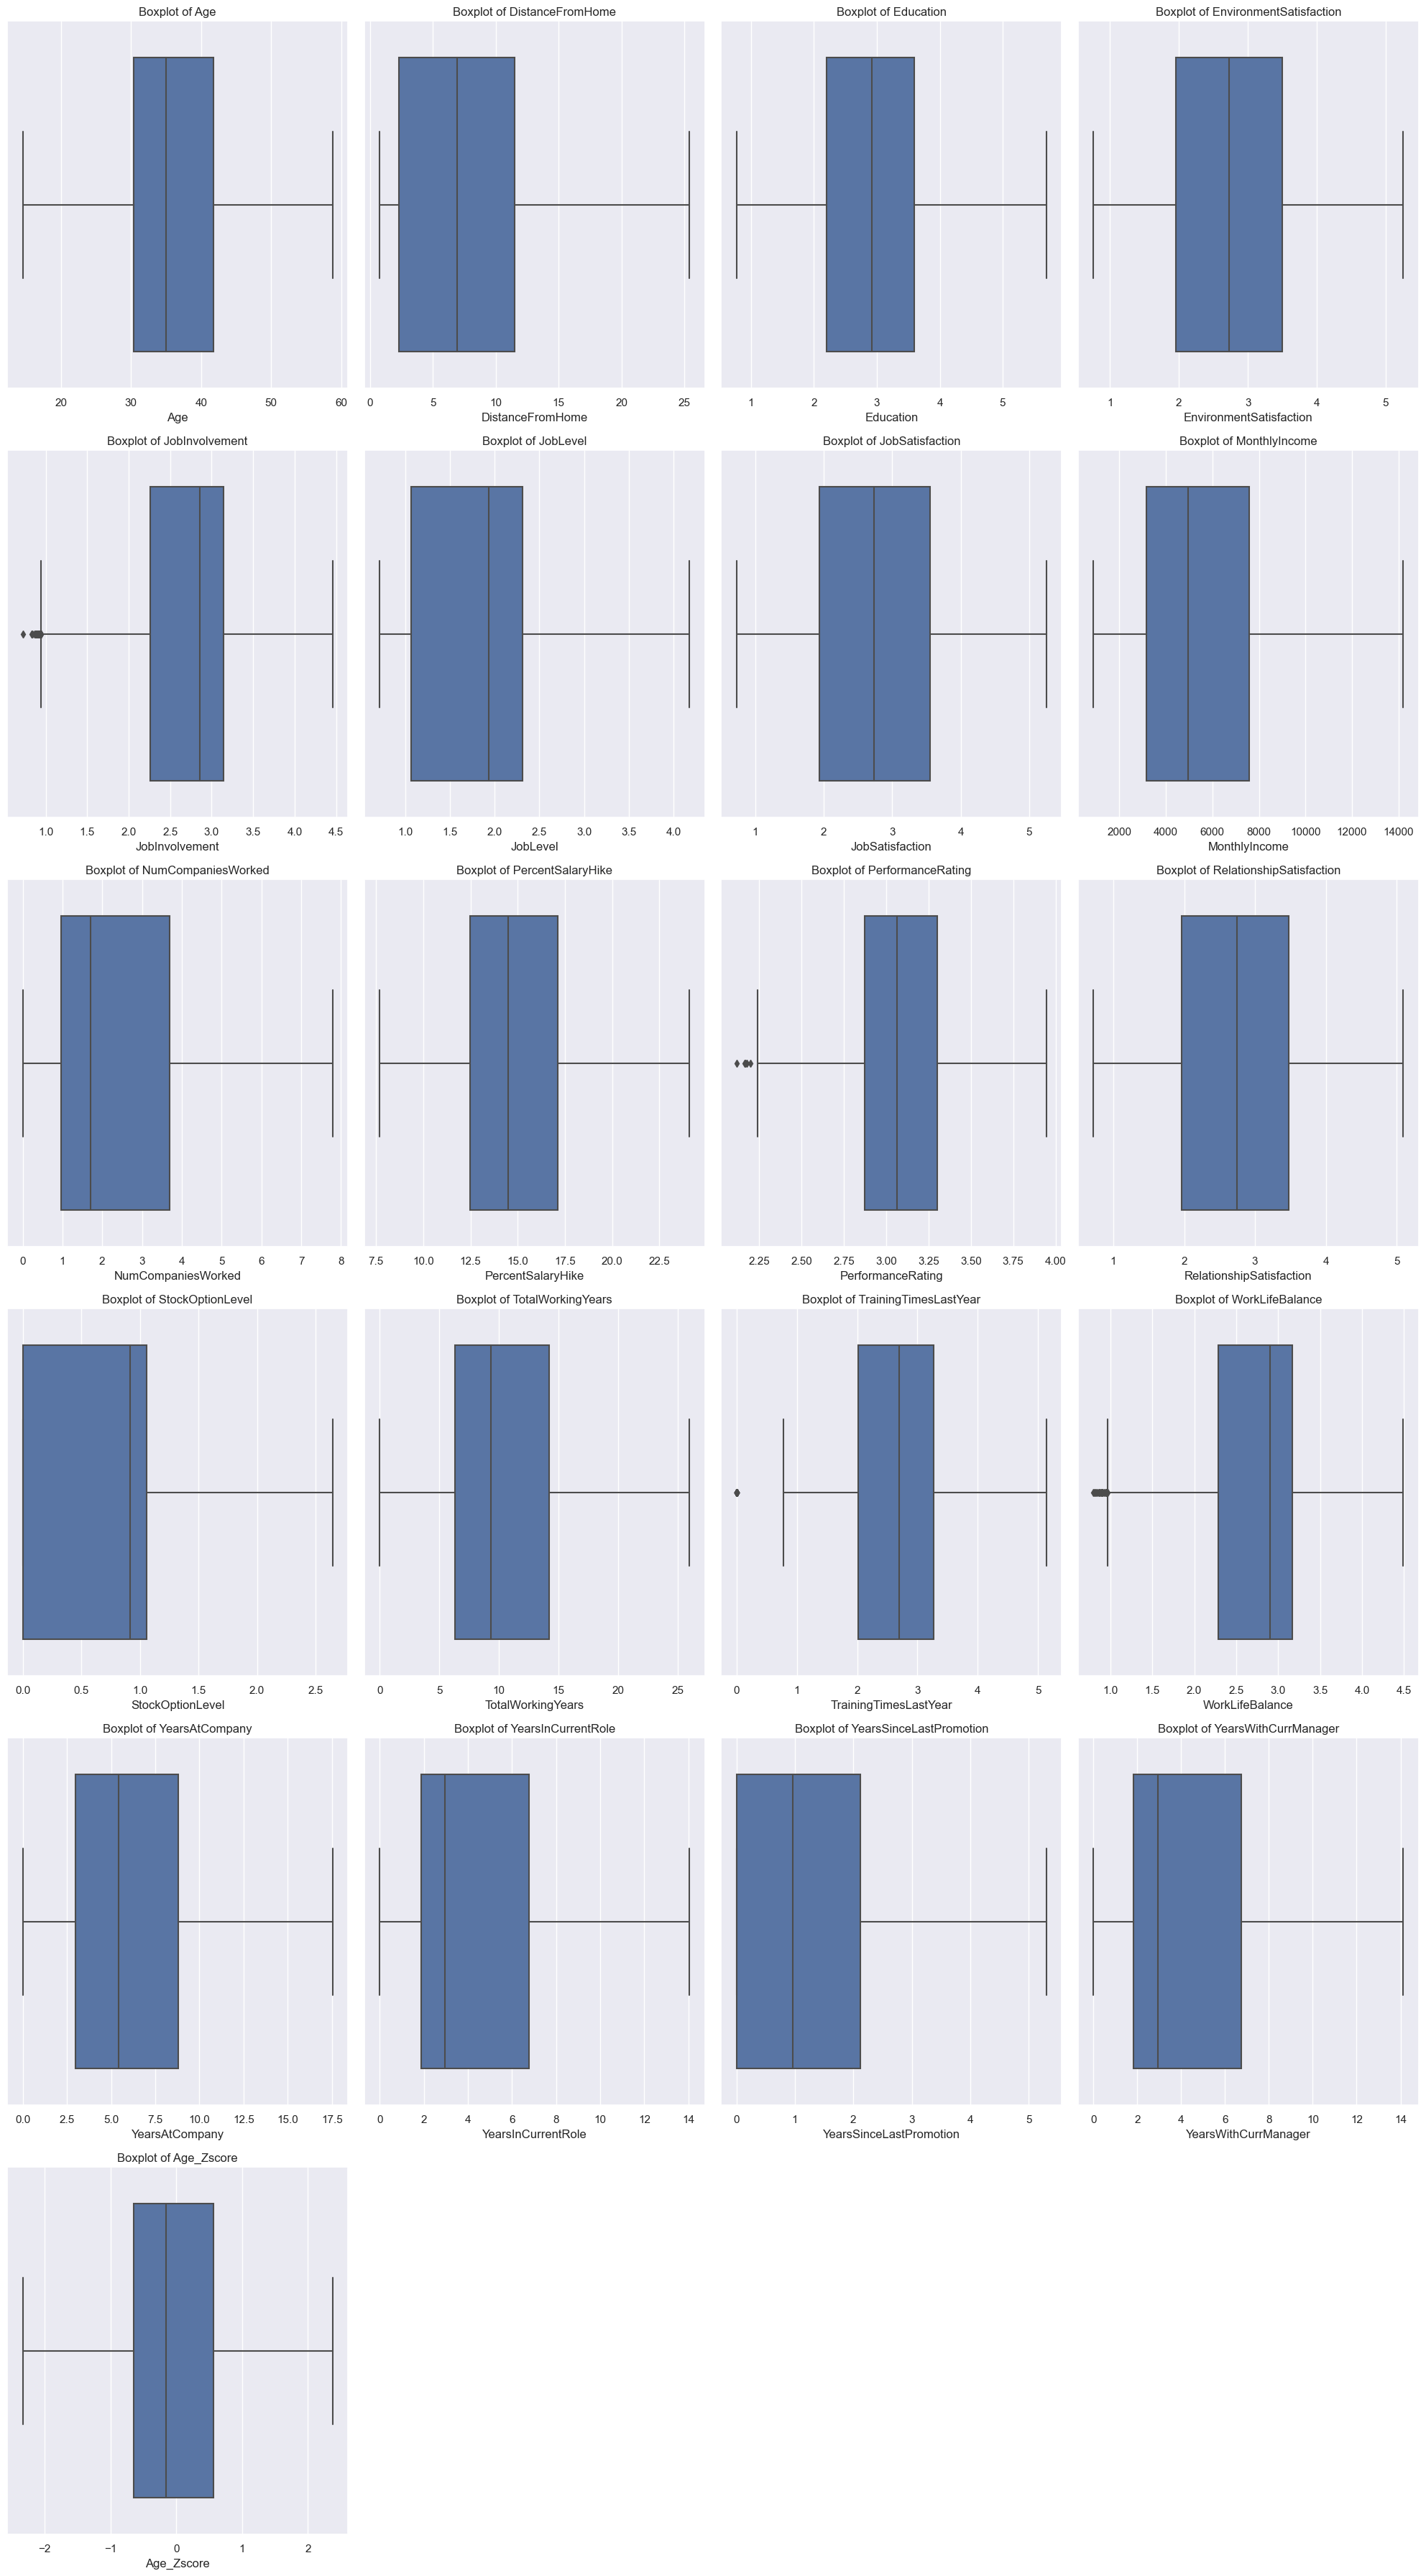

In [8]:
num_features = replace_outliers_with_upper(num_features)
plot_numeric_variable_boxplots(num_features)

In [9]:
num_columns = list(num_features.columns)
cat_columns = list(cat_features.columns)

In [10]:
df3[num_columns] = num_features
df3[cat_columns] = cat_features
df3.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Zscore
0,41.920786,Yes,Travel_Rarely,Sales,1.016716,1.770313,Life Sciences,2.146294,Male,3.426960,...,1.012832,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972,0.580921
1,51.589037,No,Travel_Frequently,Research & Development,6.920808,1.035333,Life Sciences,3.470803,Male,1.813458,...,4.312008,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207,1.610741
2,33.131540,Yes,Travel_Rarely,Research & Development,2.198662,2.118801,Other,3.979420,Male,1.877226,...,2.332558,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000,-0.355272
3,34.707073,No,Travel_Frequently,Sales,2.937851,3.670674,Life Sciences,3.734705,Female,2.932646,...,3.029591,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000,-0.187453
4,24.790188,No,Travel_Rarely,Research & Development,1.988953,1.120496,Medical,1.079412,Male,3.117739,...,2.720431,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353,-1.243757


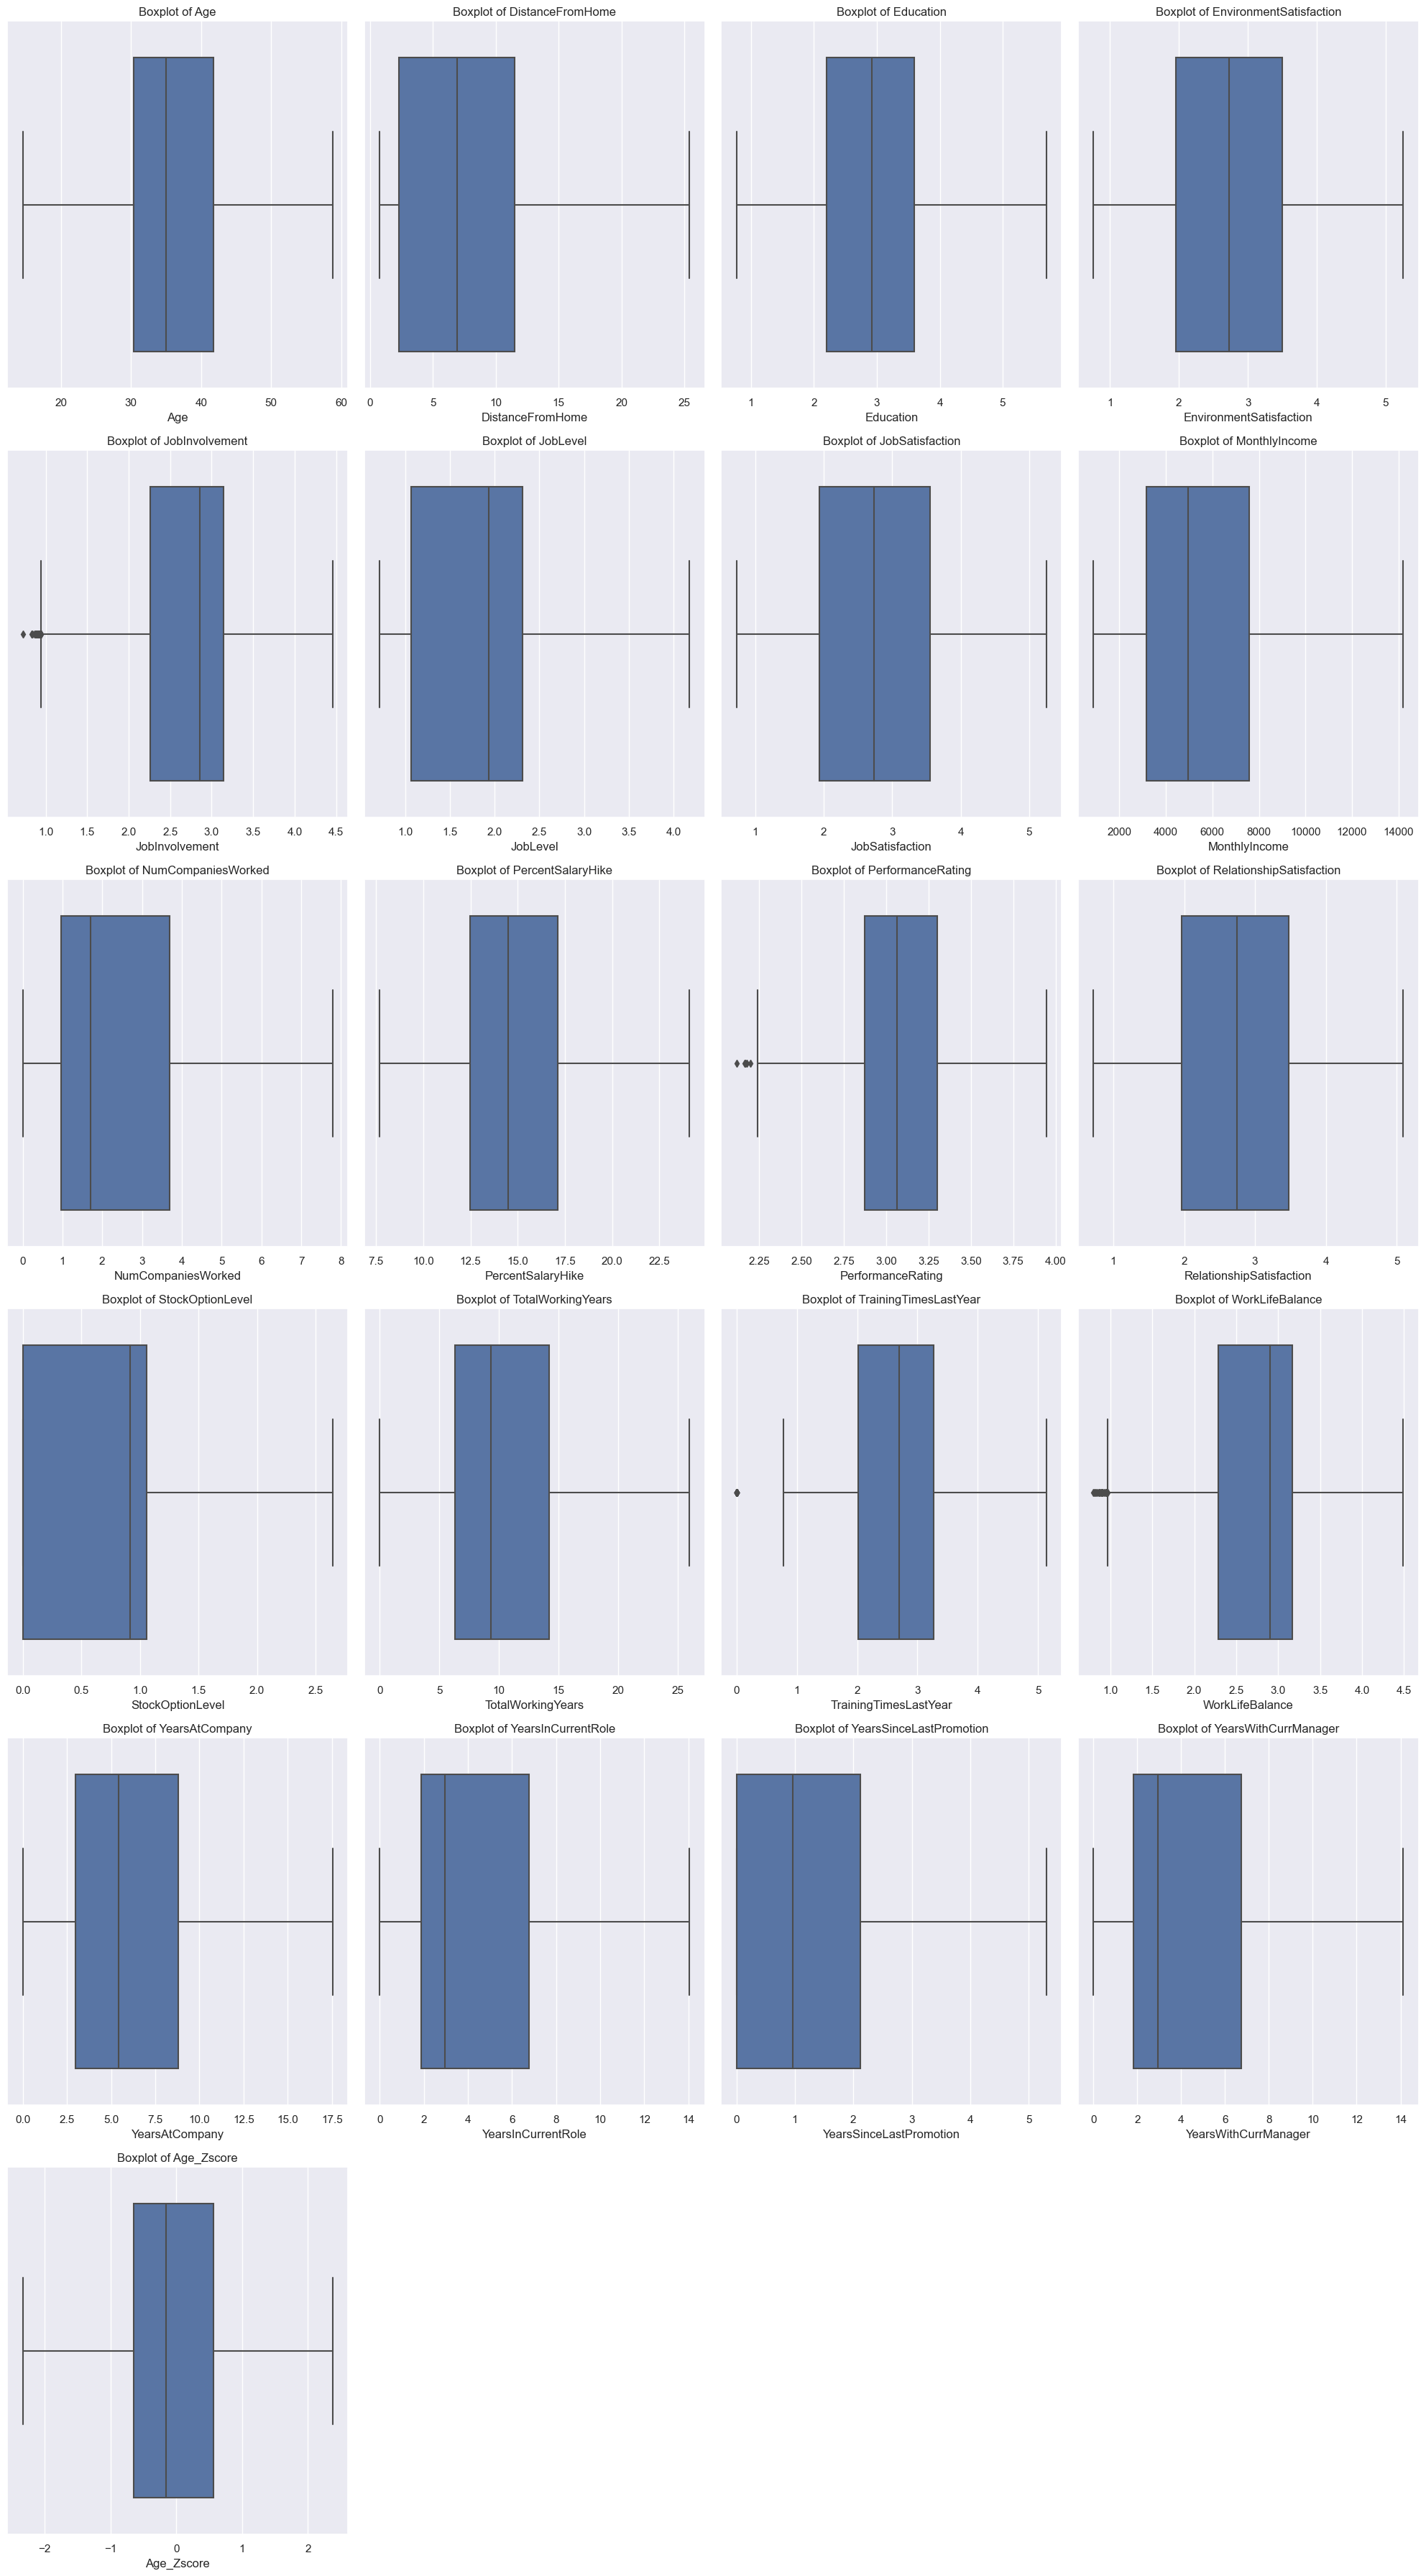

In [11]:
plot_numeric_variable_boxplots(df3)

# Encoding

In [12]:
df4=df3.copy()

In [13]:
#convert category attributes with only 2 distinct values to numeric by assigning labels
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df4['Attrition']=label_encoder.fit_transform(df3['Attrition'])
df4['OverTime']=label_encoder.fit_transform(df3['OverTime'])
df4['Gender']=label_encoder.fit_transform(df3['Gender'])

In [14]:
#convert category attributes with more than 2 distinct values to numeric using one-hot vector
df4=pd.get_dummies(df4, columns=['BusinessTravel', 'Department', 'EducationField', 
                               'JobRole', 'MaritalStatus'])

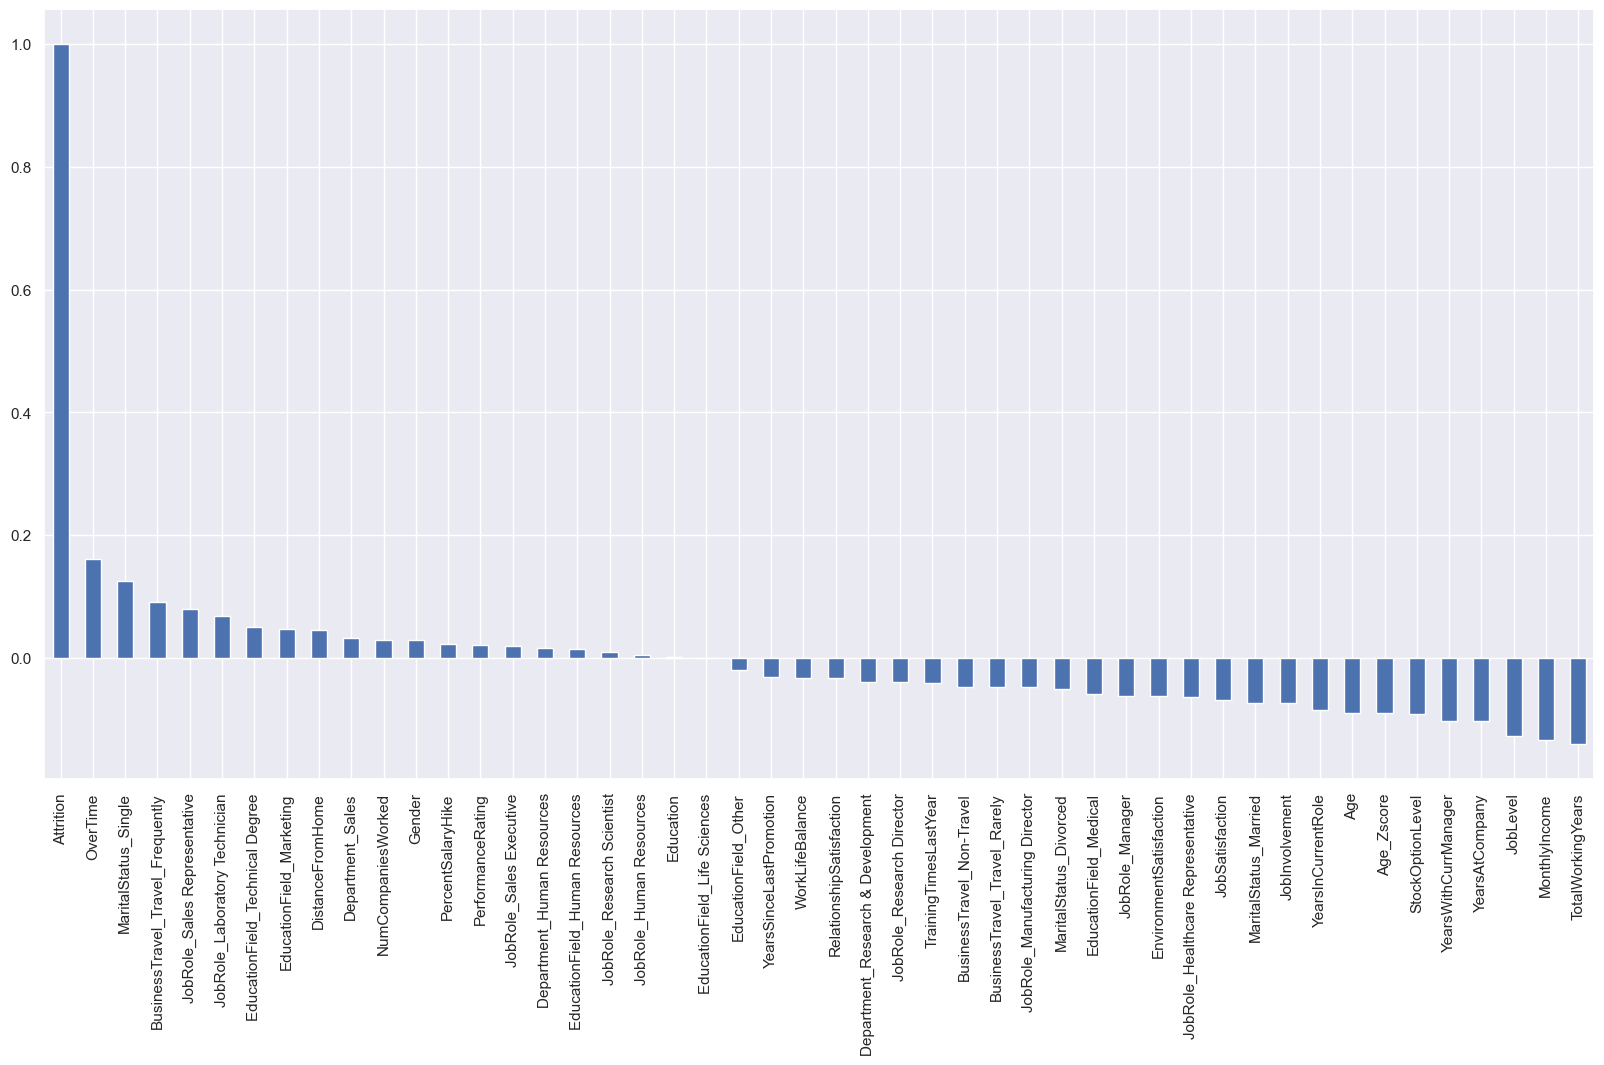

In [15]:
plt.figure(figsize=(20,10))
correlations=df4.corr()
correlations['Attrition'].sort_values(ascending = False).plot(kind='bar');

# LDA

In [16]:
np.set_printoptions(precision=4)
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import sklearn.preprocessing as preproc

In [17]:
X = df4.drop('Attrition', axis=1)
y = df4['Attrition']

In [18]:
le = LabelEncoder()
y = le.fit_transform(y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
lda = LDA(n_components=min(X_train.shape[1], len(np.unique(y_train)) - 1))
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)


In [21]:
classifier = LogisticRegression(penalty='l2', solver='sag', C=1)
fit1 = classifier.fit(X_train_lda, y_train)

In [22]:
y_pred = fit1.predict(X_test_lda)

In [23]:
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(cr)

[[357   8]
 [ 65  11]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       365
           1       0.58      0.14      0.23        76

    accuracy                           0.83       441
   macro avg       0.71      0.56      0.57       441
weighted avg       0.80      0.83      0.79       441



# PCA

In [27]:
from sklearn.decomposition import PCA

In [30]:
df5=df3.copy()

In [31]:
#convert category attributes with only 2 distinct values to numeric by assigning labels
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df5['Attrition']=label_encoder.fit_transform(df3['Attrition'])
df5['OverTime']=label_encoder.fit_transform(df3['OverTime'])
df5['Gender']=label_encoder.fit_transform(df3['Gender'])

In [32]:
#convert category attributes with more than 2 distinct values to numeric using one-hot vector
df_encoded = pd.get_dummies(df5, columns=['BusinessTravel', 'Department', 'EducationField', 
                               'JobRole', 'MaritalStatus'])
pca = PCA().fit(df_encoded)


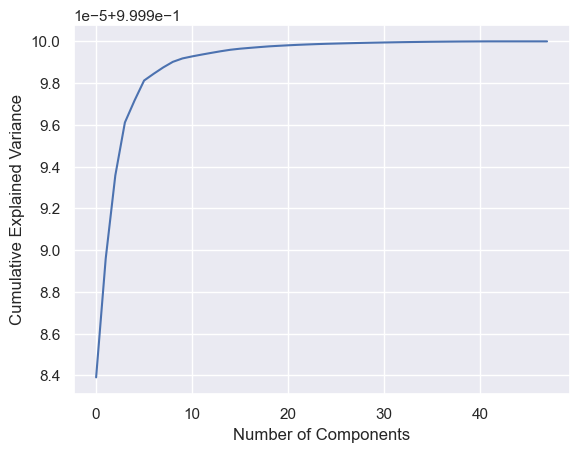

In [51]:
df_no_attrition = df_encoded.drop("Attrition", axis=1)
pca = PCA().fit(df_no_attrition)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [71]:
pca = PCA(n_components=4)
projected = pca.fit_transform(df_no_attrition)

In [72]:
projected.shape

(1470, 4)

In [73]:
df_pca = pd.DataFrame(projected, columns =['C1', 'C2', 'C3', 'C4'])

In [74]:
df_pca.head()

,C1,C2,C3,C4
0,380.804939,3.933874,-7.883594,-2.948063
1,-1600.467884,16.412171,-1.392261,1.721742
2,-3933.607188,0.966507,-6.789011,-4.617162
3,-3286.447485,2.103975,-5.734568,2.902899
4,-2803.560705,-8.619330,-7.024507,-0.835547


In [75]:
df_pca["Attrition"] = df5["Attrition"]

In [76]:
df_pca.head()

,C1,C2,C3,C4,Attrition
0,380.804939,3.933874,-7.883594,-2.948063,1
1,-1600.467884,16.412171,-1.392261,1.721742,0
2,-3933.607188,0.966507,-6.789011,-4.617162,1
3,-3286.447485,2.103975,-5.734568,2.902899,0
4,-2803.560705,-8.619330,-7.024507,-0.835547,0


In [77]:
df5_array = df_pca.values

In [79]:
from sklearn.model_selection import train_test_split
X = df5_array[:,0:4]
y = df5_array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [80]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [81]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [82]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.831638 (0.003036)
LDA: 0.831638 (0.003036)
KNN: 0.803585 (0.013151)
CART: 0.721128 (0.042175)
NB: 0.831638 (0.003036)
SVM: 0.832486 (0.003711)


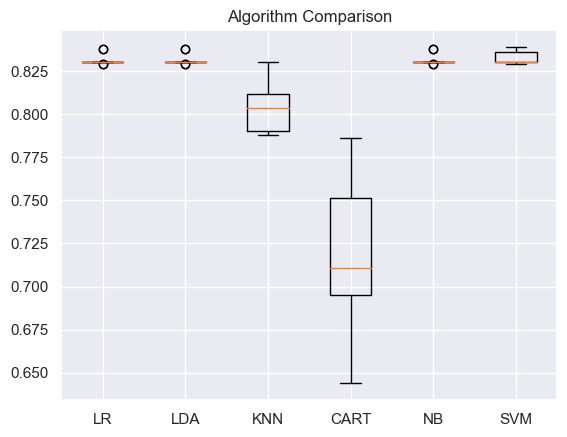

In [83]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [84]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [85]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

0.7959183673469388
[[234   0]
 [ 60   0]]


# Machine Learning

In [93]:
#Define my target variable as 'Attrition'
X = df4.drop('Attrition', axis=1)
y = df4['Attrition']

In [95]:
x_train  , x_test , y_train, y_test = train_test_split (X ,y ,test_size = 0.2 , random_state = 0)

In [96]:
#SMOTE
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(x_train,y_train)

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

log_reg=LogisticRegression(C=1000,max_iter=10000)
log_reg.fit(smote_train, smote_target)
y_pred_lg = log_reg.predict(x_test)

print ('accuracy',metrics.accuracy_score(y_test, y_pred_lg))

accuracy 0.8163265306122449


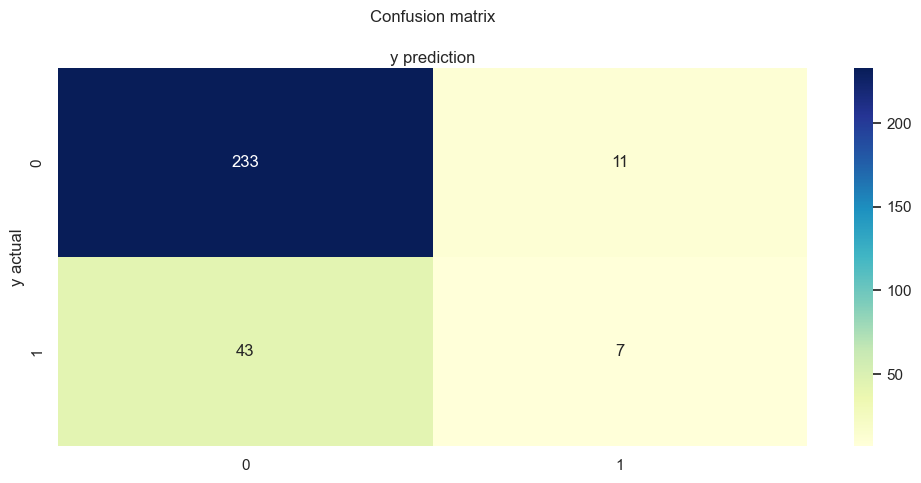

              precision    recall  f1-score   support

           0       0.84      0.95      0.90       244
           1       0.39      0.14      0.21        50

    accuracy                           0.82       294
   macro avg       0.62      0.55      0.55       294
weighted avg       0.77      0.82      0.78       294



In [99]:
fig, ax = plt.subplots(figsize=(10,5))
cm = metrics.confusion_matrix(y_test,y_pred_lg)
sns.heatmap(metrics.confusion_matrix(y_test,y_pred_lg),annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()

print(classification_report(y_test, y_pred_lg))

# Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1176, 47), (294, 47), (1176,), (294,))

In [108]:
rfc = RandomForestClassifier()
rfc = rfc.fit(smote_train , smote_target)
y_pred = rfc.predict(x_test)

print ('accuracy',metrics.accuracy_score(y_test, y_pred))

accuracy 0.9727891156462585


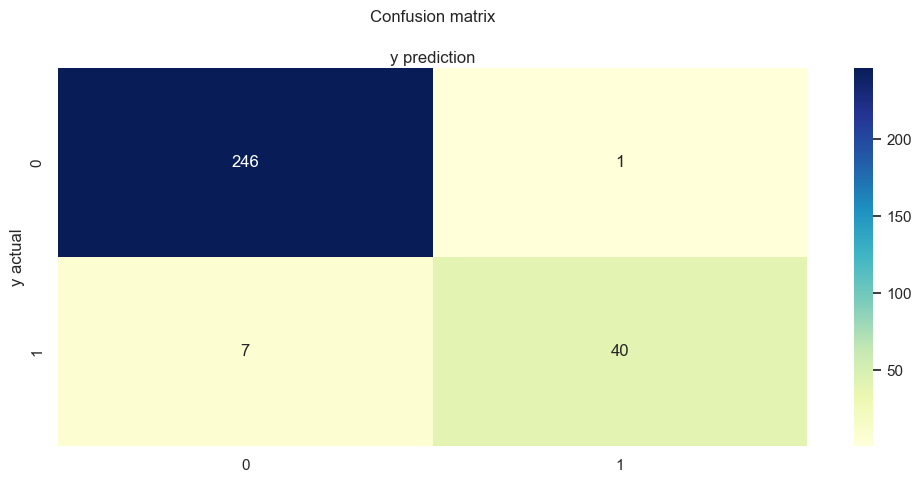

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       247
           1       0.98      0.85      0.91        47

    accuracy                           0.97       294
   macro avg       0.97      0.92      0.95       294
weighted avg       0.97      0.97      0.97       294



In [103]:
fig, ax = plt.subplots(figsize=(10,5))
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()

print(classification_report(y_test, y_pred))

In [109]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [{'max_depth': [None, 10, 20, 30, 40, 50],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4],
                 'max_features': ['auto', 'sqrt', 'log2']}]

model = DecisionTreeRegressor()
     
# set up GridSearchCV()
model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_params,
                        scoring='neg_mean_squared_error',
                        cv=folds,
                        verbose=2,
                        return_train_score=True)
# fit the model
model_cv.fit(X_train, y_train)  


Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_lea

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5;

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=1

[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_spli

[CV] END max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_spl

[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_spl

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [None, 10, 20, 30, 40, 50],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_leaf': [1, 2, 4],
                          'min_samples_split': [2, 5, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [110]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001934,0.003868,0.000000,0.000000,None,auto,1,2,"{'max_depth': None, 'max_features': 'auto', 'm...",NaN,...,NaN,NaN,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.003039,0.005053,0.000000,0.000000,None,auto,1,5,"{'max_depth': None, 'max_features': 'auto', 'm...",NaN,...,NaN,NaN,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000614,0.000502,0.000000,0.000000,None,auto,1,10,"{'max_depth': None, 'max_features': 'auto', 'm...",NaN,...,NaN,NaN,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000195,0.000389,0.000000,0.000000,None,auto,2,2,"{'max_depth': None, 'max_features': 'auto', 'm...",NaN,...,NaN,NaN,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000200,0.000399,0.000000,0.000000,None,auto,2,5,"{'max_depth': None, 'max_features': 'auto', 'm...",NaN,...,NaN,NaN,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.005770,0.005985,0.007153,0.012825,50,log2,2,5,"{'max_depth': 50, 'max_features': 'log2', 'min...",-0.199859,...,-0.233001,0.018963,65,-0.040957,-0.036043,-0.035866,-0.040383,-0.036858,-0.038021,0.002196
158,0.006678,0.003639,0.001554,0.000431,50,log2,2,10,"{'max_depth': 50, 'max_features': 'log2', 'min...",-0.230449,...,-0.223834,0.030026,54,-0.055704,-0.052917,-0.054780,-0.061106,-0.057924,-0.056486,0.002817
159,0.006131,0.005112,0.000517,0.000450,50,log2,4,2,"{'max_depth': 50, 'max_features': 'log2', 'min...",-0.188964,...,-0.208272,0.016110,28,-0.067358,-0.063628,-0.070702,-0.075548,-0.074147,-0.070277,0.004374
160,0.004888,0.000457,0.001204,0.000403,50,log2,4,5,"{'max_depth': 50, 'max_features': 'log2', 'min...",-0.203585,...,-0.200466,0.007057,11,-0.071879,-0.074274,-0.072478,-0.065865,-0.067686,-0.070436,0.003145


In [111]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is -0.18554374197021348 corresponding to hyperparameters {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10}


In [112]:
from sklearn import metrics

# specify optimal hyperparameters
best_params = {"max_depth": 20, "max_features": "sqrt", "min_samples_leaf": 2, "min_samples_split": 5}

# model
dt_model = DecisionTreeRegressor(max_depth=best_params["max_depth"],
                              min_samples_split=best_params["min_samples_split"],
                              min_samples_leaf=best_params["min_samples_leaf"],
                              max_features=best_params["max_features"])

dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

# metrics
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

Mean Squared Error: 0.19300359032501888
R2 Score: -0.43702802423407094


In [113]:
# k fold cross validation

from sklearn.model_selection import cross_val_score

dt_model = DecisionTreeRegressor()

# Perform cross-validation for R-squared
cross_val_results = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10, scoring='r2')

# Fit the model on the training data (if needed)
dt_model.fit(X_train, y_train)

# Print the cross-validation results
print("Cross-Validation R-squared scores:")
print(cross_val_results)
print("Mean R-squared:", cross_val_results.mean())

Cross-Validation R-squared scores:
[-1.8259 -1.0322 -0.9116 -0.8362 -0.8778 -0.8271 -0.9299 -1.3706 -0.8474
 -1.0704]
Mean R-squared: -1.0529072723755424


In [114]:
feature_importances = dt_model.feature_importances_

# Create a mapping of feature indices to column names
feature_names_mapping = dict(zip(range(len(X.columns)), X.columns))

# Map the indices to column names and print the result
important_features = [feature_names_mapping[i] for i in range(len(feature_importances))]
print("Most Important Feature:", important_features[feature_importances.argmax()])

Most Important Feature: Education


In [115]:
# Making predictions on the testing set
y_pred = dt_model.predict(X_test)
type(y_pred)

numpy.ndarray

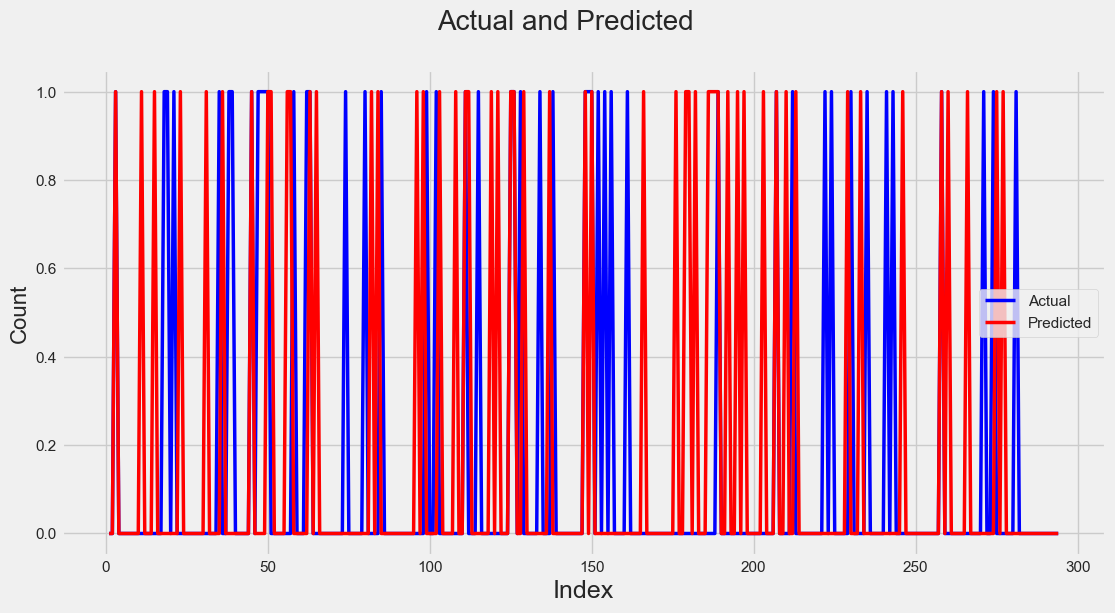

In [116]:
#plotting actual against predicted
c = [i for i in range(1, len(y_test)+1)]  # Generating index
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-", label='Actual')
plt.plot(c, y_pred, color="red", linewidth=2.5, linestyle="-", label='Predicted')
fig.suptitle('Actual and Predicted', fontsize=20)  # Plot heading
plt.xlabel('Index', fontsize=18)  # X-label
plt.ylabel('Count', fontsize=16)  # Y-label
plt.legend()
plt.show()

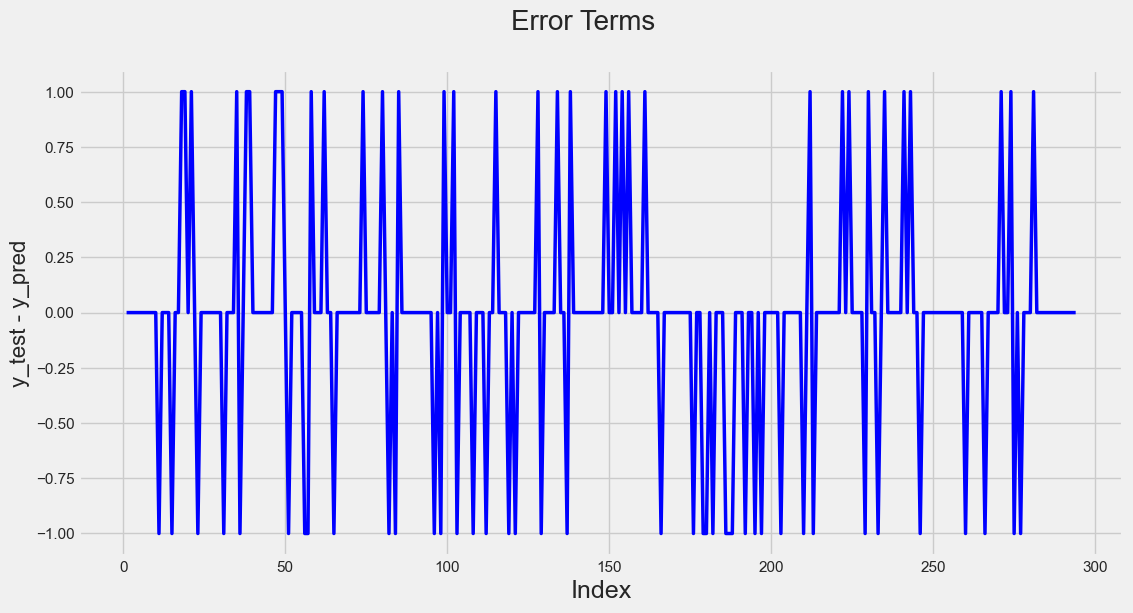

In [117]:
c = [i for i in range(1, len(y_test)+1)] 
fig = plt.figure()
plt.plot(c, y_test - y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18) 
plt.ylabel('y_test - y_pred', fontsize=16)  
plt.show()

In [118]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [119]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.2585034013605442
r_square_value : -0.9247135842880523


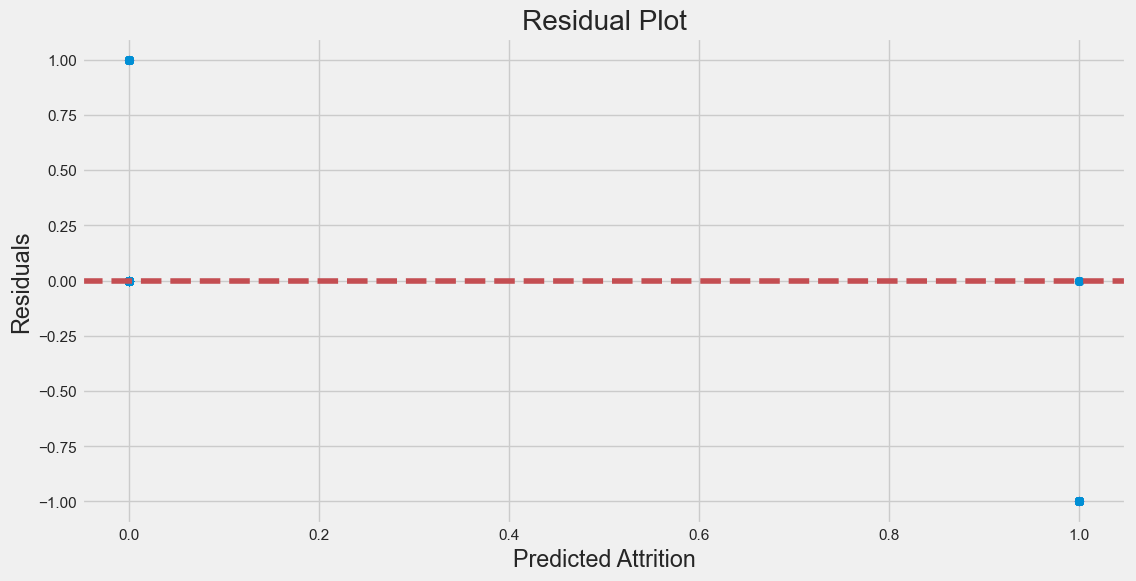

In [121]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Attrition")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

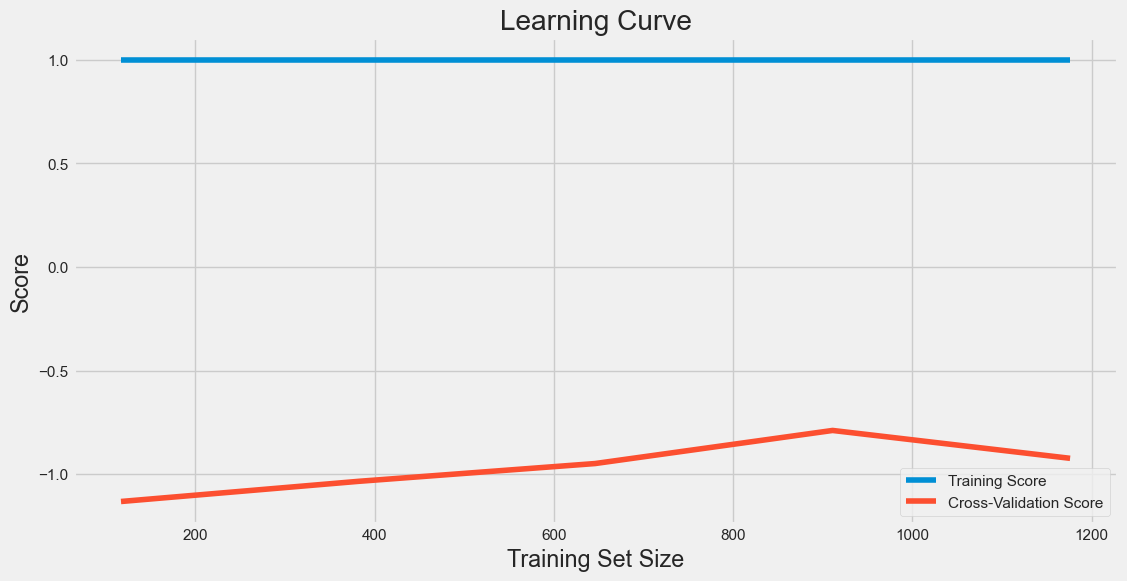

In [122]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(dt_model, X, y, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

# Decision Tree

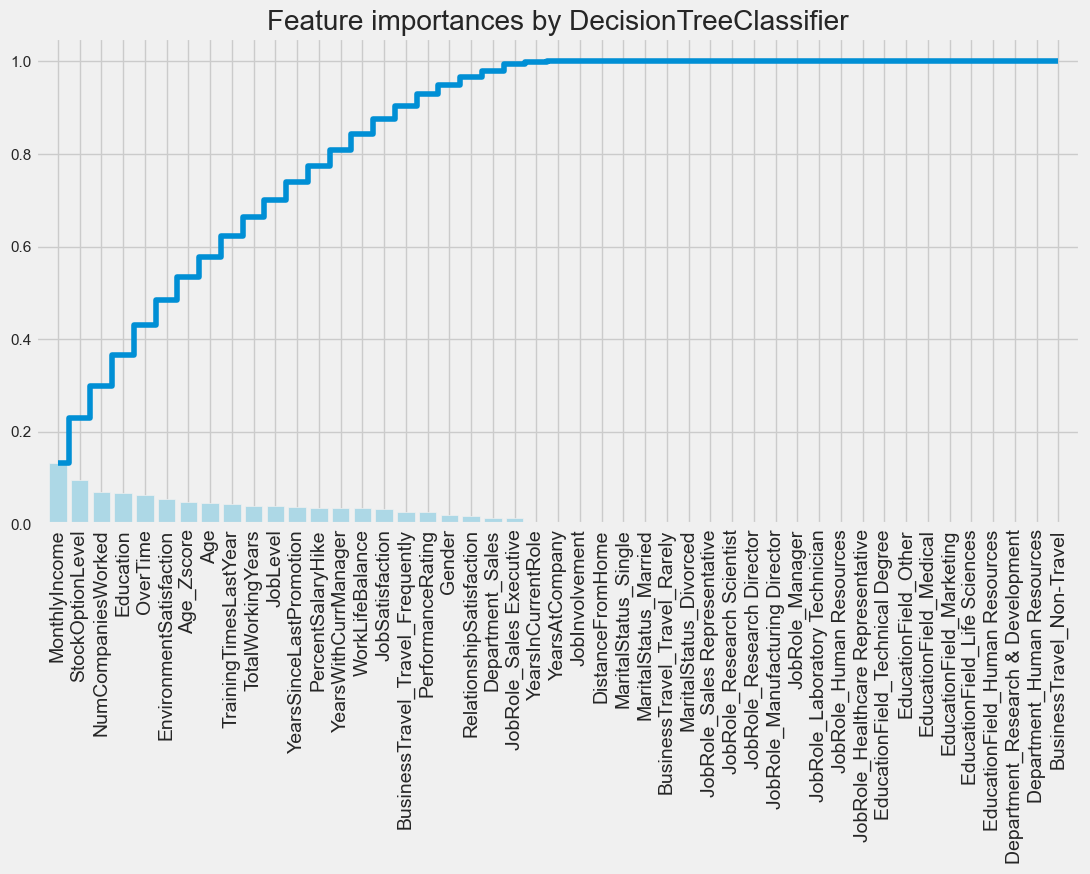

In [104]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)



# Create train and test splits
X = df4.drop('Attrition', axis=1)
y = df4['Attrition']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df4.drop(['Attrition'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()